# Heart Disease Prediction with highest accuracy
### Modelling, Heart Disease Prediction, Comparisons and Conclusion
## DSI7 - Capstone Project 
### By Didem Iscan


## Outline

1. Introduction
2. Data Cleaning
    - Importing 4 different dataset & building a data frame
    - Predicting missing values
3. EDA 
    - Data description & plotting
4. Modelling & Predicting
    - Finding the best model & predict heart disease with highest accuracy  
5. Comparing Best Model with dropped missing values vs predicted missing values
    - Defining new data frame (dropped null values)
    - Model the data frame & compare your scores with the best model
6. Conclusion

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm_notebook
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV, ElasticNetCV, LogisticRegression, LogisticRegressionCV, Perceptron
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

import imp
#plotter = imp.load_source('plotter', './plotting-code/roc_plotter.py')
#from plotter import ROCLogisticPlotter

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
#warnings.filterwarnings(action='ignore', category=SettingWithCopyWarning)
#warnings.exceptions(action='ignore', category=UserWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
random_state = 1
#by assigning a random_state I will be using the same random models
np.random.seed(seed = 1)
#this fill fix my random arrays for the predicted values // each time I will have the same random list

### Importing the Data 

In [2]:
df = pd.read_csv('../DSI7_Capstone_Final/Datasets/df_nonull_updated.csv')

# 4. Modelling & Predicting

In this section, I analysed the data by using different models and find the best model which gives the best accuracy score for heart disease prediction. 

Subsections:
1. Defining Values
2. Modelling
3. Improving the Modelling & Accuracy Score
4. Model Selection

** Defining the Values **  
1. Define X & y
    - X: whole the dataset except pred_attributes column
    - y: pred_attributes
        - The predicted values are 0, 1, 2, 3, and 4. I categorised it as 0 and 1, classified them by having a heart disease (1), or healthy (0). I replaced 2, 3, 4 to 1. 
2. Standardize the X
3. Train&Test split
4. Try different modelling
    - Use classification model & confusion matrix
    - Compare the accuracy score for each model
5. Find the best model to predict heart disease


** Modelling ** 
1. Logistic Regression
2. Grid Search
3. Use models and print the accuracy score for each model
    - Compare the Cross Validation, Train, Test scores


** Improving the Modelling & Accuracy Score **

1. Finding the most related columns
    - Check the correlation 
    - Check the best features of models from grid search
        - choose the best columns 
2. Do the modelling for the best columns
    - Compare the new accuracy scores


** Model Selection ** 
1. Choose the best 3-5 models and continue analysis
    * Change the parameters by using GirdSearch and see the improvement
    * Pick the best model 

At the end I compared the scores and suggested the best model to predict heart disease. 

### Defining the Values

** Defining the X & y Values ** 

In [3]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 
        'slop', 'ca', 'thal','origin']]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,origin
0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,Cleveland
1,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,Cleveland
2,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,Cleveland
3,48.0,0.0,3.0,130.0,275.0,0.0,0.0,139.0,0.0,0.2,1.0,0.0,3.0,Cleveland
4,58.0,0.0,1.0,150.0,283.0,1.0,2.0,162.0,0.0,1.0,1.0,0.0,3.0,Cleveland


In [4]:
y = df[['pred_attribute']]

In [5]:
y.pred_attribute.value_counts()

0.0    411
1.0    196
2.0    135
3.0    135
4.0     43
Name: pred_attribute, dtype: int64

** Modifying the y value ** 

In [6]:
y['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)

In [7]:
y.pred_attribute.value_counts()

1.0    509
0.0    411
Name: pred_attribute, dtype: int64

** Get Dummies for Categorical Values & Standardizing the X ** 

In [8]:
X_dum = pd.get_dummies(X, columns= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slop', 'ca', 'thal', 'origin'], 
                       drop_first=True)

In [9]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X_dum)
Xs = pd.DataFrame(Xs, columns=X_dum.columns)
Xs.head()

,age,trestbps,chol,thalach,oldpeak,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_0.0,...,ca_1.0,ca_2.0,ca_3.0,ca_9.0,thal_3.0,thal_6.0,thal_7.0,origin_Hungarian,origin_LongBeach,origin_Switzerland
0,-1.328180,-0.114381,0.090357,1.363763,0.463595,-1.934494,2.070593,-0.533775,-1.081578,0.434316,...,-0.398359,-0.377964,-0.152837,-0.032987,1.707306,-0.249711,-0.807283,-0.685309,-0.527046,-0.392847
1,0.370413,-0.637777,1.410084,1.013477,-0.285023,-1.934494,-0.482953,-0.533775,0.924575,0.434316,...,-0.398359,-0.377964,-0.152837,-0.032987,1.707306,-0.249711,-0.807283,-0.685309,-0.527046,-0.392847
2,0.264251,0.409014,0.882193,0.624269,0.370018,-1.934494,2.070593,-0.533775,-1.081578,0.434316,...,-0.398359,-0.377964,-0.152837,-0.032987,1.707306,-0.249711,-0.807283,-0.685309,-0.527046,-0.392847
3,-0.585045,-0.114381,0.715028,0.079379,-0.659332,-1.934494,-0.482953,1.873447,-1.081578,0.434316,...,-0.398359,-0.377964,-0.152837,-0.032987,1.707306,-0.249711,-0.807283,-0.685309,-0.527046,-0.392847
4,0.476575,0.932410,0.785413,0.974556,0.089286,-1.934494,-0.482953,-0.533775,-1.081578,-2.302470,...,-0.398359,-0.377964,-0.152837,-0.032987,1.707306,-0.249711,-0.807283,-0.685309,-0.527046,-0.392847


** Finding the Baseline ** 

In [10]:
y.pred_attribute.value_counts(normalize=True)
print('Baseline:')
print(y.pred_attribute.value_counts(normalize=True))

Baseline:
1.0    0.553261
0.0    0.446739
Name: pred_attribute, dtype: float64


** Train-Test Split ** 

In [11]:
y = y.pred_attribute

In [12]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3,random_state=random_state)

In [13]:
freqs = pd.DataFrame({'Training': [y_train.sum(),y_train.shape[0] - y_train.sum()],
                      'Test':[y_test.sum(), y_test.shape[0] - y_test.sum()]}, index=['Healthy', 'Sick'])
freqs['Total'] = freqs.Training + freqs.Test
freqs

,Training,Test,Total
Healthy,351.0,158.0,509.0
Sick,293.0,118.0,411.0


### Modelling

1. Define the models
2. Cross Validate on test data 
    - get CV score for train
3. Fit the model 
    - Check the train & test scores
    - Accuracy Scores

In [14]:
def grid_search_func_tt(model, params, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                        scoring='r2',cv=5):
    gs = GridSearchCV(
        estimator=model,
        param_grid=params,
        return_train_score=True,
        scoring=scoring,
        cv=cv,
        iid=False)

    gs.fit(X_train, y_train)

    print("Best score")
    print(gs.best_score_)
    print()
    print("Best estimator")
    print(gs.best_estimator_.get_params())
    print()

    predictions = gs.best_estimator_.predict(X_test)
    print('Test score: ', scoring_function(y_test, predictions))


    return gs

In [15]:
def score_compare(X_train,X_test,y_train,y_test,model):
    print('Model:', model)
    print('')
    print('CV Test Score:', cross_val_score(model, X_test, y_test, cv=5).mean())
    print('CV Train Score:', cross_val_score(model, X_train, y_train, cv=5).mean())

    model.fit(X_train, y_train)
    print('Training Data Accuracy Score:', model.score(X_train, y_train))
    print('Test Data Accuracy Score:', model.score(X_test, y_test))
    print('')


In [16]:
#regressor
params_dtr = {'max_depth': list(range(1,11))+[None],'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
              'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split':[5,10,15,20,25,30,40,50]}
params_rfr = {'n_estimators': np.arange(10,100,10), 'max_depth': np.linspace(10,10,10), 
              'max_features': ['auto','sqrt'], 'bootstrap':['True','False']}
params_bgr = {'base_estimator':[None, DecisionTreeRegressor(),KNeighborsRegressor(),SVR()],
              'n_estimators':np.arange(10,100,10), 'max_samples':np.linspace(0.8, 1.0, 3), 
              'max_features':range(int(3/4.*X.shape[1]), X.shape[1]+1), 'bootstrap':['True','False']}

#classifier
params_dtc = {'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,11), 'max_features':range(1,X.shape[1]+1),
              'min_samples_split':[5,10,15,20,25,30,40,50]}
params_rfc = {'criterion': ['gini', 'entropy'], 'n_estimators':np.arange(10,100,10), 
              #'max_samples': np.linspace(0.8, 1.0, 3), 
              'bootstrap':['True','False'], 
              'max_features':['auto', 'sqrt', 'log2'], 'max_depth' : [1, 5, 10, 15, 20, 25, 30], 
              'min_samples_leaf' : [1, 2, 4, 6, 8, 10]}
params_bgc = {'base_estimator':[None, Perceptron(),KNeighborsClassifier(),SVC()], 
              'n_estimators':np.arange(10,100,10), 'max_samples': np.linspace(0.8, 1.0, 3), 
              'max_features':range(int(3/4.*X.shape[1]), X.shape[1]+1), 'bootstrap': ['True','False']}

In [17]:
#regressor
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()
model_bgr = BaggingRegressor()

#classifier
model_dtc = DecisionTreeClassifier()
model_rfc = RandomForestClassifier()
model_bgc = BaggingClassifier()

The function above is showing the train & test score of not fitted cross validated model and fitted without cross validated model.

- We are expecting to have higher training score when we fit the model. But at the end the train & test score should be close to each other, which will show us the data is not overfitted. 

** Logistic Regression**

In [18]:
model_lr = LogisticRegression(random_state=random_state)

In [19]:
score_compare(X_train,X_test,y_train,y_test,model_lr)

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

CV Test Score: 0.8301587301587301
CV Train Score: 0.8585366353607633
Training Data Accuracy Score: 0.8788819875776398
Test Data Accuracy Score: 0.855072463768116



- The train & test data accuracy scores are close to each other and higher than the baseline, which shows us the model can do better prediction than the baseline. 

In [20]:
y_pred_lr = model_lr.predict(X_train)

In [21]:
confusion_matrix(y_train,y_pred_lr)

array([[260,  33],
       [ 45, 306]])

- From the confusion matrix above we can see the false negative score. 
- For medical analysis and predictions our aim is to have the lowest false negative, because we don't want to diagnose an unhealthy patient as a healthy patient. 
- Here the false negative score is 38/644 = 0.059 

In [22]:
print(classification_report(y_train, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       293
         1.0       0.90      0.87      0.89       351

   micro avg       0.88      0.88      0.88       644
   macro avg       0.88      0.88      0.88       644
weighted avg       0.88      0.88      0.88       644



** Checking the Classifier Grid Search and Finding the Best Model **

In [23]:
gs_rfc = grid_search_func_tt(model_rfc, params=params_rfc, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
gs_bgc = grid_search_func_tt(model_bgc, params=params_bgc, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
gs_dtc = grid_search_func_tt(model_dtc, params=params_dtc, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

Best score
0.5169269268445271

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.5114782235571765
Best score
0.5171022629053103

Best estimator
{'base_estimator': None, 'bootstrap': 'True', 'bootstrap_features': False, 'max_features': 14, 'max_samples': 1.0, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.4374597725809912
Best score
0.3604316254040902

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 13, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1

In [24]:
score_compare(X_train,X_test,y_train,y_test,gs_dtc.best_estimator_)

Model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=13, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

CV Test Score: 0.8010582010582011
CV Train Score: 0.7950413685152057
Training Data Accuracy Score: 0.8229813664596274
Test Data Accuracy Score: 0.782608695652174



- The test & train accuracy scores are close to each other, so there isnt any overfitting on the data.
- CV scores are also close to each other, this shows us the model trained the data well for test data to predict correctly. 

In [25]:
score_compare(X_train,X_test,y_train,y_test,gs_rfc.best_estimator_)

Model: RandomForestClassifier(bootstrap='False', class_weight=None,
            criterion='entropy', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=80, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

CV Test Score: 0.8588624338624339
CV Train Score: 0.8615535554561717
Training Data Accuracy Score: 0.9813664596273292
Test Data Accuracy Score: 0.8768115942028986



- The test & train accuracy scores are again close to each other, so there isnt any overfitting on the data.
- CV scores are not as close as dtc model. 

In [26]:
score_compare(X_train,X_test,y_train,y_test,gs_bgc.best_estimator_)

Model: BaggingClassifier(base_estimator=None, bootstrap='True',
         bootstrap_features=False, max_features=14, max_samples=1.0,
         n_estimators=80, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

CV Test Score: 0.8480158730158731
CV Train Score: 0.8631522063208109
Training Data Accuracy Score: 1.0
Test Data Accuracy Score: 0.8659420289855072



- The test & train accuracy scores are close to each other, so there isnt any overfitting on the data.
- CV scores are also close to each other, this shows us the model trained the data well for test data to predict correctly. 

- The best model can be bgc or dtc, below by checking the accuracy scores, I choose the best model from the grid search

In [27]:
y_pred_class = gs_dtc.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class))

0.8229813664596274


In [28]:
y_pred_class = gs_rfc.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class))

0.9813664596273292


In [29]:
y_pred_class = gs_bgc.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class))

1.0


- From the accuracy scores for each model, the highest score is from **gs_bgc** model. Next I am continuing analysing the confusion matrix on this model.

In [30]:
y_pred_rfc = gs_bgc.best_estimator_.predict(X_train)

In [31]:
print(confusion_matrix(y_train,y_pred_rfc))

[[293   0]
 [  0 351]]


In [32]:
0/644

0.0015527950310559005

- By using Grid Search and finding the best model our false positive rate has decreased to 1/644 = 0.001. Which shows that using Grid Search method with different models & parameters will increase our probability of correct predictions.  

In [33]:
print(classification_report(y_train, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       293
         1.0       1.00      1.00      1.00       351

   micro avg       1.00      1.00      1.00       644
   macro avg       1.00      1.00      1.00       644
weighted avg       1.00      1.00      1.00       644



** Trying Other Models & Comparing the Accuracy Scores **

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import decomposition, preprocessing, svm
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier

In [35]:
models_names = ["k-Nearest Neighbors","Support Vector Machine","Linear SVM","RBF SVM","Gaussian Process",
                "Decision Tree","Extra Trees","Random Forest","Gradient Boost","AdaBoost","Gaussian Naive Bayes",
                "LDA","QDA","Logistic Regression","SGD Classifier","Multilayer Perceptron","Voting Classifier", 
                "Bagging Classifier"]

models = [KNeighborsClassifier(n_neighbors=3),
          SVC(random_state=random_state),
          SVC(kernel="linear",random_state=random_state),
          SVC(kernel="rbf",random_state=random_state),
          GaussianProcessClassifier(),
          DecisionTreeClassifier(random_state=random_state),
          ExtraTreesClassifier(random_state=random_state),
          RandomForestClassifier(random_state=random_state),
          GradientBoostingClassifier(random_state=random_state),
          AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),n_estimators=10,learning_rate=0.1,
                             random_state=random_state),
          GaussianNB(),
          LinearDiscriminantAnalysis(),
          QuadraticDiscriminantAnalysis(),
          LogisticRegression(random_state=random_state),
          SGDClassifier(),               
          MLPClassifier(hidden_layer_sizes=(100,),momentum=0.9,solver='sgd',random_state=random_state),
          VotingClassifier(estimators=[('log', LogisticRegression()), ('SVM',SVC(C=1000)), 
                                       ('MLP', MLPClassifier(hidden_layer_sizes=(100,)))], voting='hard'),
          BaggingClassifier(KNeighborsClassifier(),random_state=random_state)]

          

classifiers = {"k-Nearest Neighbors" : KNeighborsClassifier(n_neighbors=3),
               "Support Vector Machine" :  SVC(random_state=random_state),
               "Linear SVM" :  SVC(kernel="linear",random_state=random_state),
               "RBF SVM" :  SVC(kernel="rbf",random_state=random_state),
               "Gaussian Process" : GaussianProcessClassifier(),
               "Decision Tree" : DecisionTreeClassifier(random_state=random_state),
               "Extra Trees" : ExtraTreesClassifier(random_state=random_state),
               "Random Forest" : RandomForestClassifier(random_state=random_state),
               "Gradient Boost" : GradientBoostingClassifier(random_state=random_state),
               "AdaBoost" : AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),
                                               n_estimators=10,random_state=random_state,learning_rate=0.1),
               "Gaussian Naive Bayes" : GaussianNB(),
               "LDA" : LinearDiscriminantAnalysis(),
               "QDA" :  QuadraticDiscriminantAnalysis(),
               "Logistic Regression" : LogisticRegression(random_state=random_state),
               "SGD Classifier" : SGDClassifier(),
               "Multilayer Perceptron" :  MLPClassifier(hidden_layer_sizes=(100,),momentum=0.9,solver='sgd',
                                                        random_state=random_state),
               "Voting Classifier" : VotingClassifier(estimators=[('log', LogisticRegression()), ('SVM',SVC(C=1000)),
                                                                  ('MLP', MLPClassifier(hidden_layer_sizes=(100,)))],
                                                      voting='hard'),
               "Bagging Classifier" : BaggingClassifier(KNeighborsClassifier(),random_state=random_state)}

In [36]:
def score_compare(X_train,X_test,y_train,y_test,model):
    print('Model:', model)
    print('')
    print('CV Test Score:', cross_val_score(model, X_test, y_test, cv=5).mean())
    print('CV Train Score:', cross_val_score(model, X_train, y_train, cv=5).mean())

    model.fit(X_train, y_train)
    print('Training Data Accuracy Score:', model.score(X_train, y_train))
    print('Test Data Accuracy Score:', model.score(X_test, y_test))
    print('')

In [59]:
cv_train = []
cv_test = []
train = []
test = []
for model in models:
    cv_test.append(cross_val_score(model, X_test, y_test, cv=5).mean())
    cv_train.append(cross_val_score(model, X_train, y_train, cv=5).mean())
    model.fit(X_train,y_train)
    train.append(model.score(X_train, y_train))
    test.append(model.score(X_test, y_test))
    
scores_df = pd.DataFrame(cv_train, index=models_names)   
scores_df.columns=['CV Train Score']
scores_df['CV Test Score'] = cv_test
scores_df['Training Data Accuracy Score'] = train
scores_df['Testing Data Accuracy Score'] = test
scores_df['Train-Test Difference'] = scores_df['Training Data Accuracy Score'] - scores_df['Testing Data Accuracy Score']
scores_df.sort_values('Train-Test Difference', ascending=False)

,CV Train Score,CV Test Score,Training Data Accuracy Score,Testing Data Accuracy Score,Train-Test Difference
AdaBoost,0.779284,0.793519,1.000000,0.811594,0.188406
Decision Tree,0.782360,0.797222,1.000000,0.818841,0.181159
Gaussian Process,0.830569,0.815476,0.990683,0.851449,0.139234
Random Forest,0.836831,0.832804,0.992236,0.862319,0.129917
Extra Trees,0.832108,0.854894,1.000000,0.880435,0.119565
Voting Classifier,0.852347,0.823016,0.968944,0.851449,0.117495
Gradient Boost,0.861686,0.848148,0.956522,0.855072,0.101449
Support Vector Machine,0.873981,0.851984,0.930124,0.858696,0.071429
RBF SVM,0.873981,0.851984,0.930124,0.858696,0.071429
k-Nearest Neighbors,0.836794,0.818915,0.909938,0.862319,0.047619


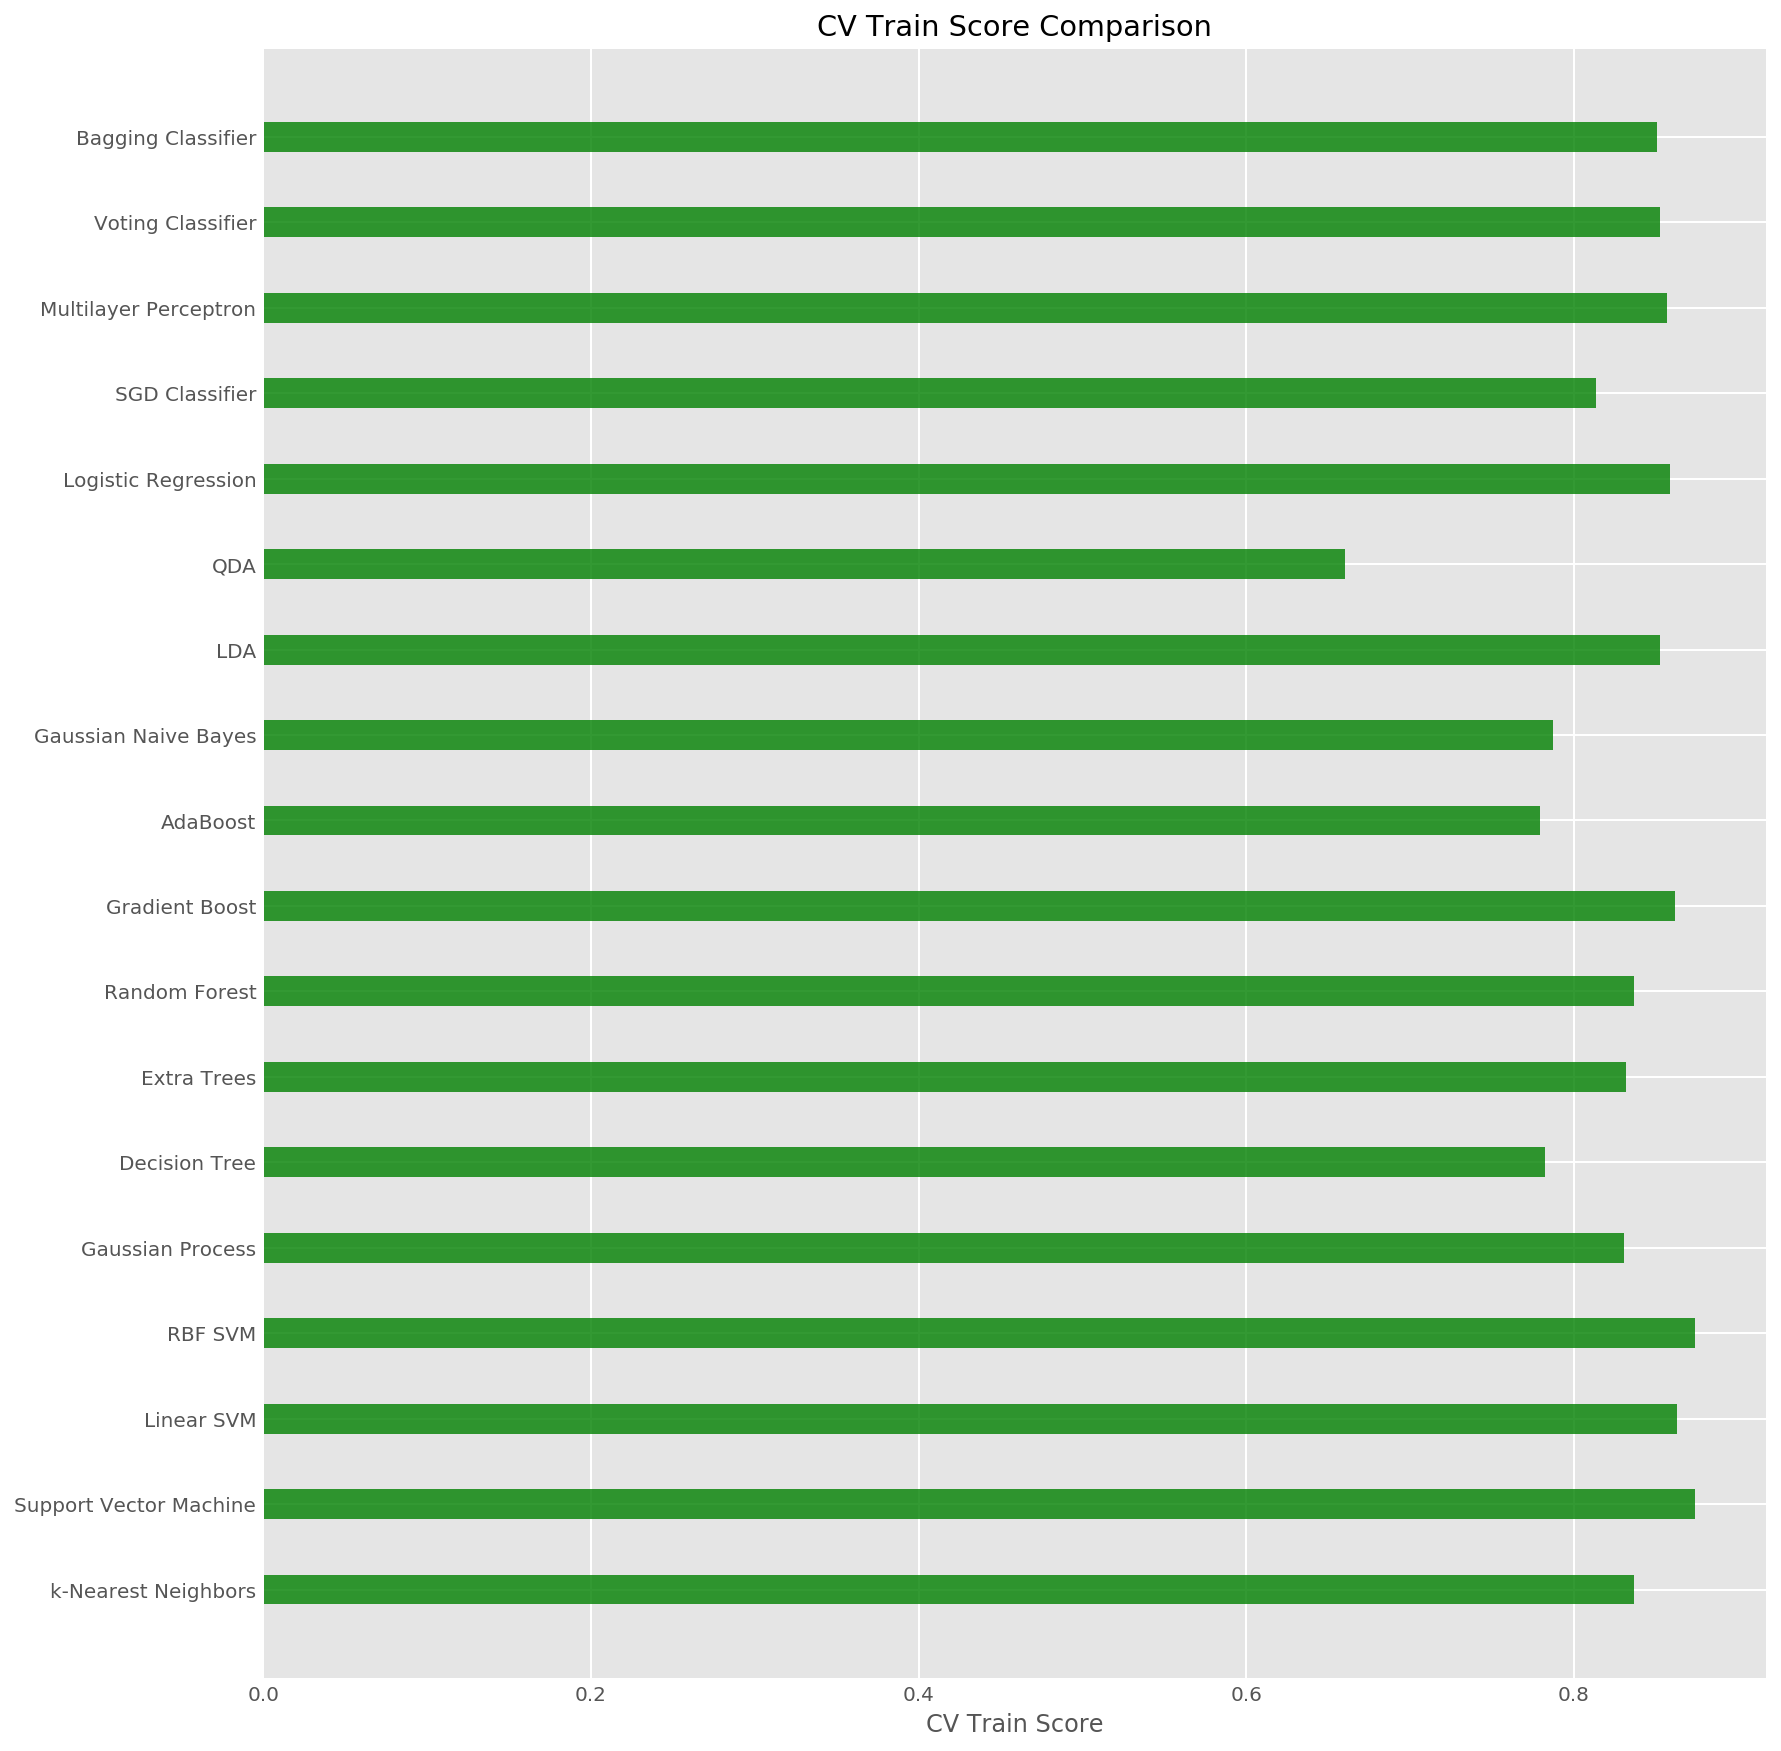

In [94]:
fig = plt.figure(figsize=(12,15))
index = models_names
bar_width = 0.35
y_pos = np.arange(len(index))

plt.barh(y_pos, scores_df['CV Train Score'], bar_width, align='center', alpha=0.8, color=['green'])
plt.yticks(y_pos, index)
plt.xlabel('CV Train Score')
plt.title('CV Train Score Comparison')
 
plt.show()

- Above I ran many different models to see the prediction and the score differences between different models. Here the scores are showing us if the model is training the data well. If it does than the test scores will be close to the training score. If not the test and train scores will have a big difference.  
- Decision Tree, Extra Trees and ADA Boost Classifier models gives us %100 accuracy score on the train data. But their test data is approximately 78-83%. 
- Overall the training scores are very high as we expected, and most of the test data is close to the train data. The most difference between these scores are in ADA Boost, Decision Tree, Extra Trees, GaussianProcessClassifier and RandomForestClassifier, which shows us there is overfitting on the data for those models.

In [61]:
df_copy=[]
for model in models:
    model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    df_copy.append(metrics.accuracy_score(pred_test, y_test))
    
models_df = pd.DataFrame(df_copy, index=models_names)   
models_df.columns=['AccuracyScore']
models_df.sort_values('AccuracyScore',ascending=False)

,AccuracyScore
Extra Trees,0.880435
Bagging Classifier,0.876812
Multilayer Perceptron,0.862319
Random Forest,0.862319
k-Nearest Neighbors,0.862319
RBF SVM,0.858696
Support Vector Machine,0.858696
Linear SVM,0.858696
Voting Classifier,0.858696
Gradient Boost,0.855072


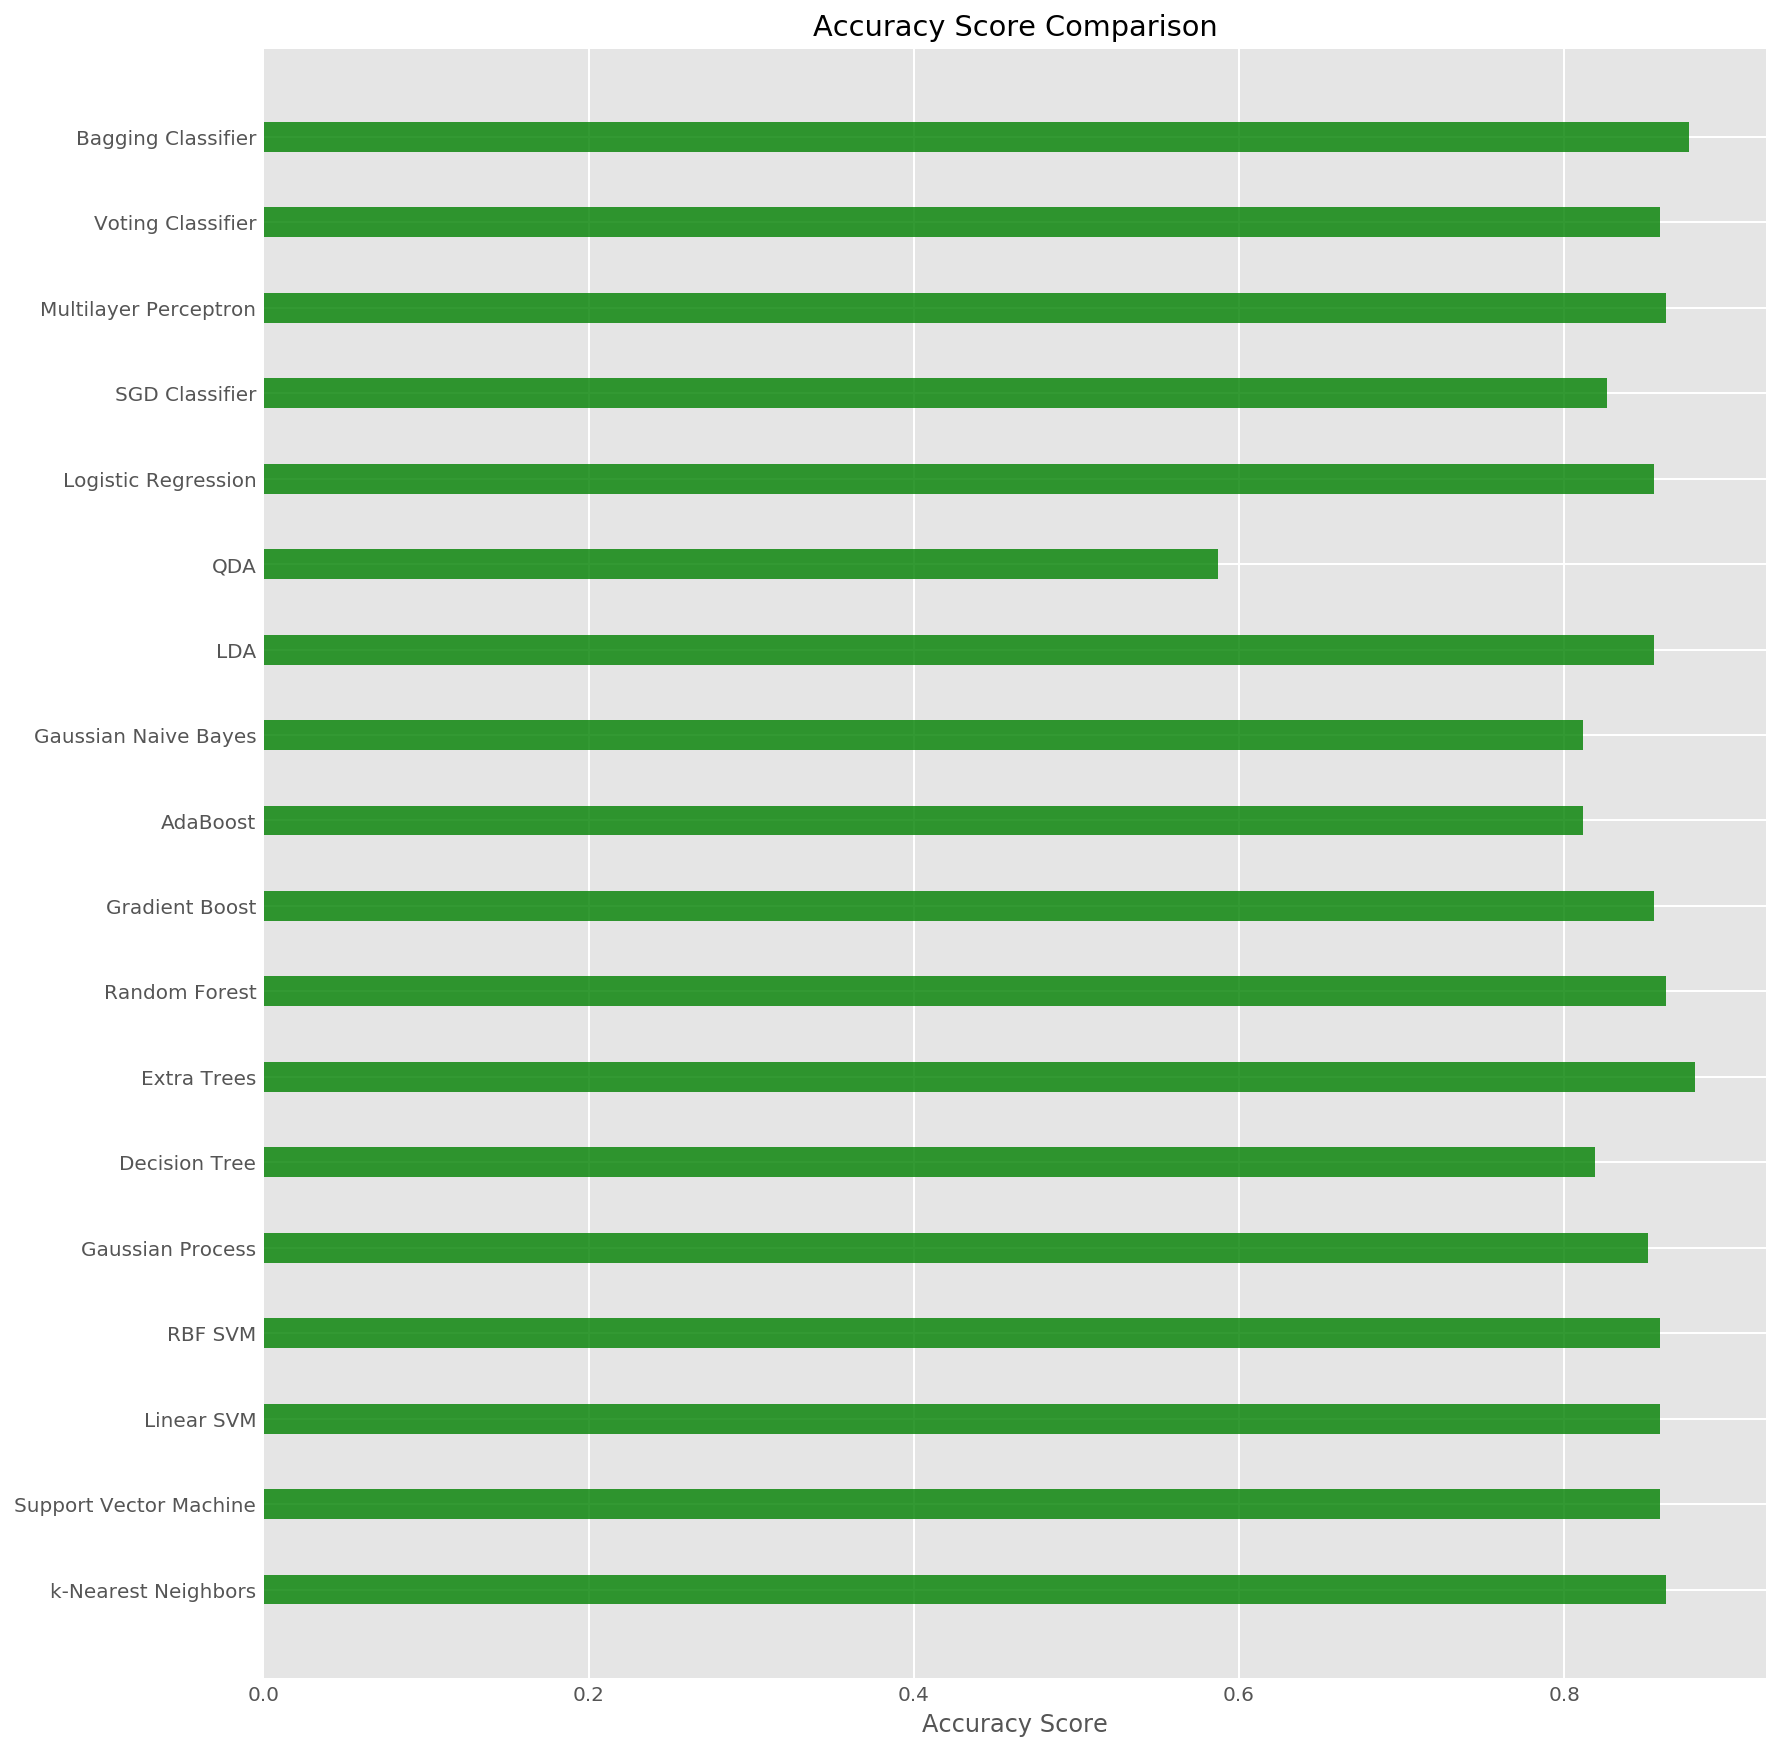

In [95]:
fig = plt.figure(figsize=(12,15))
index = models_names
bar_width = 0.35
y_pos = np.arange(len(index))

plt.barh(y_pos, models_df.AccuracyScore, bar_width, align='center', alpha=0.8, color=['green'])
plt.yticks(y_pos, index)
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score Comparison')
 
plt.show();

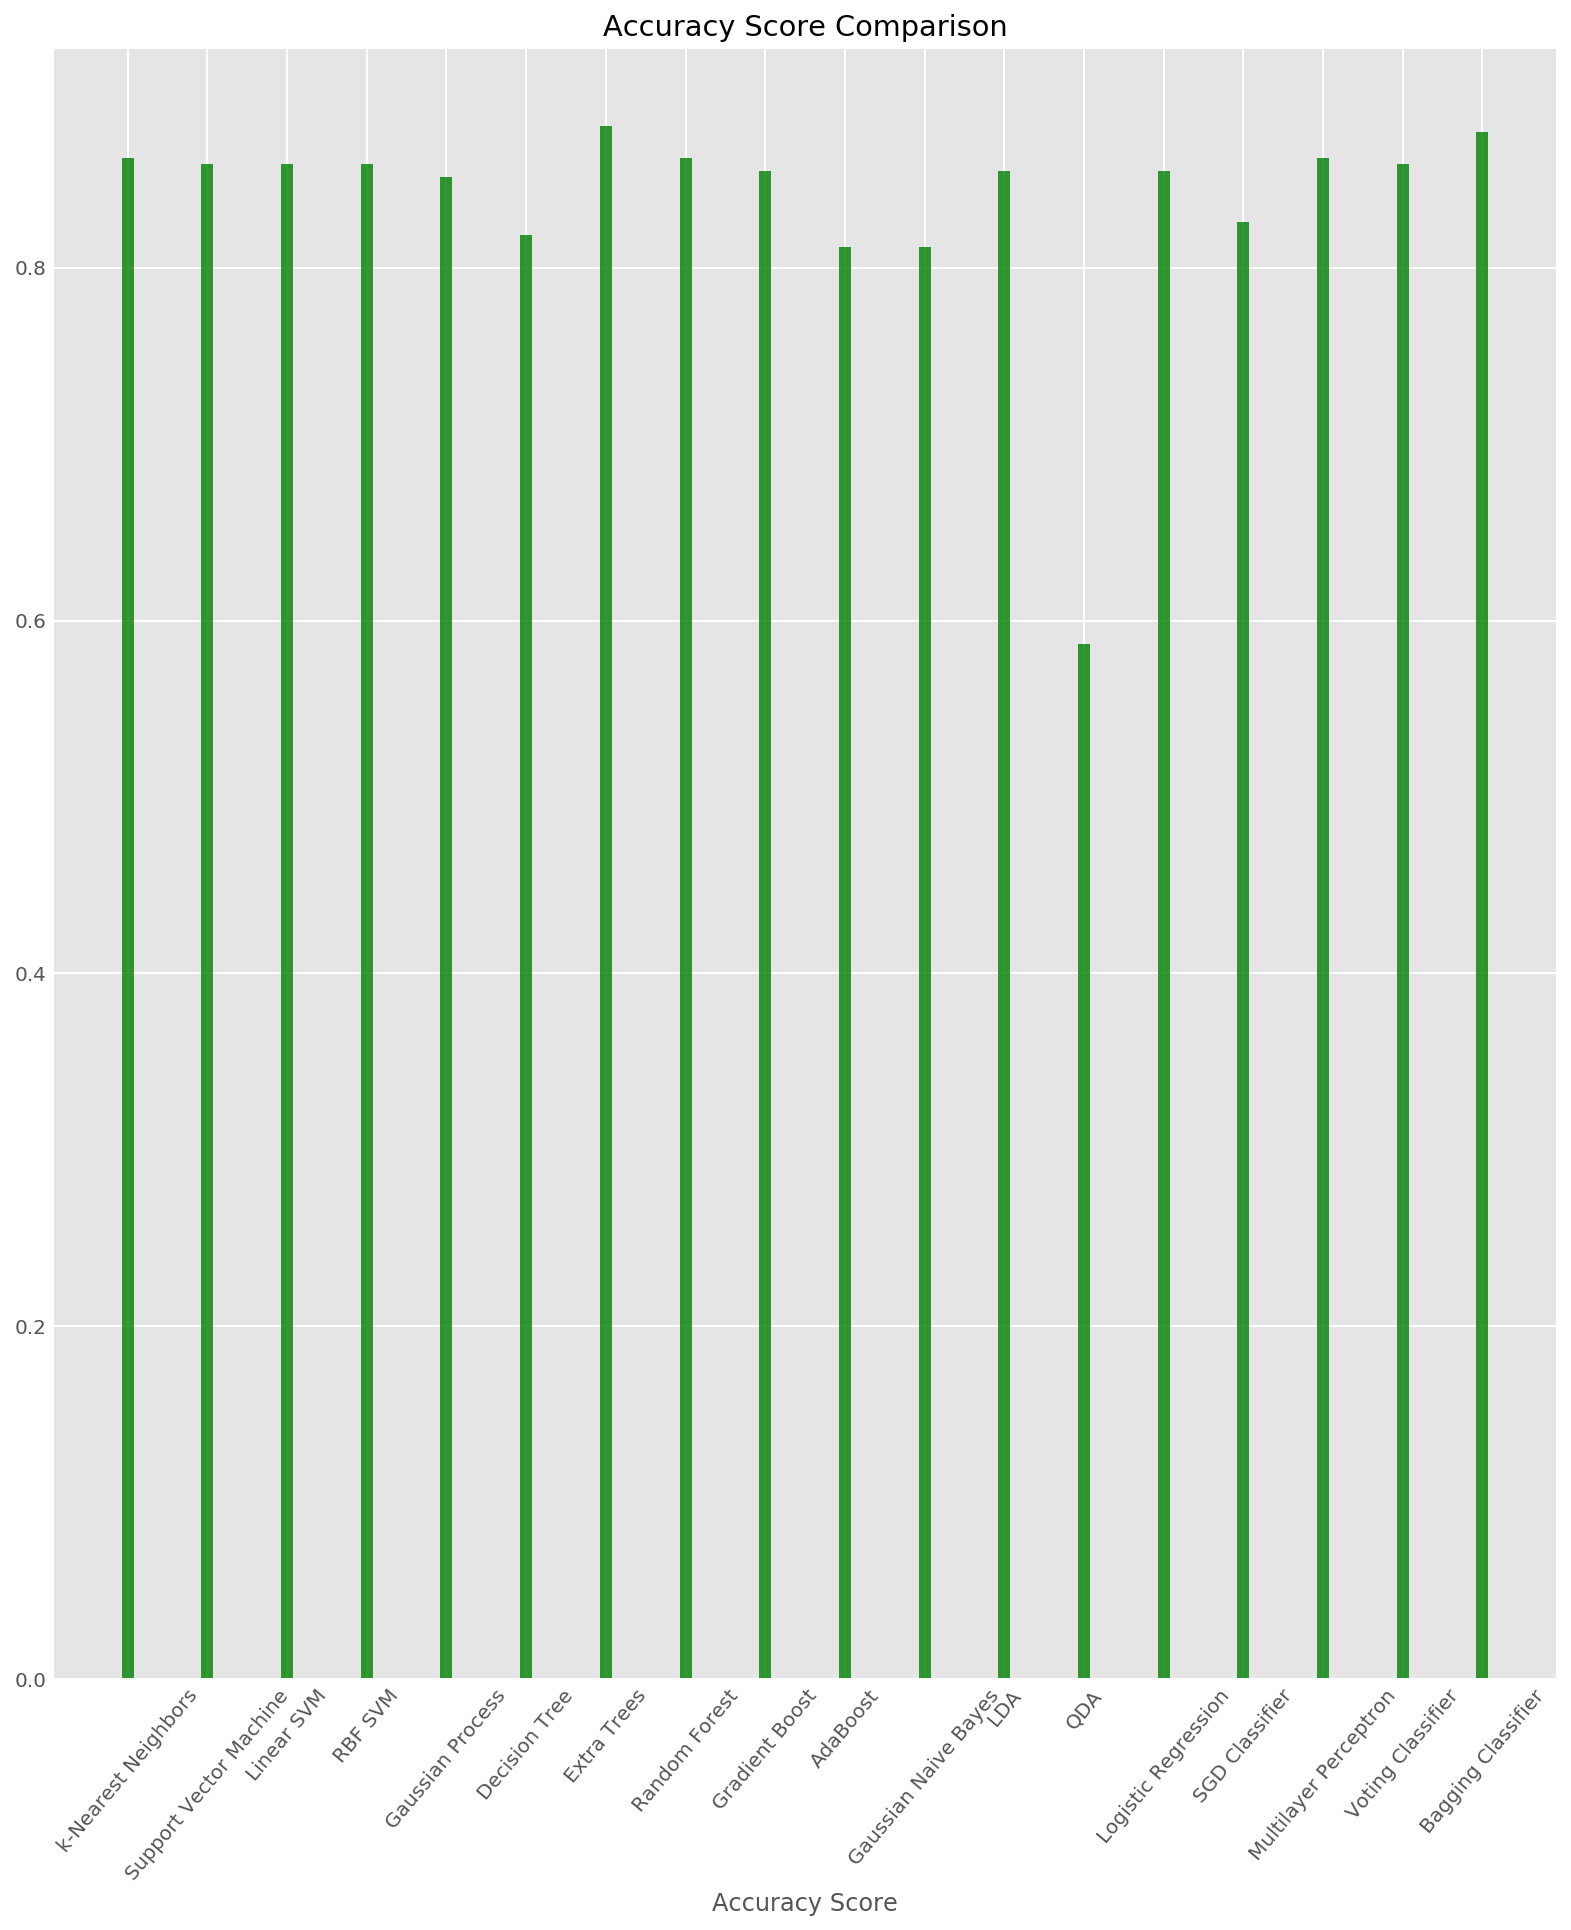

In [101]:
fig = plt.figure(figsize=(12,15))
index = models_names
bar_width = 0.15
opacity = 0.8
y_pos = np.arange(len(index))

plt.bar(index, models_df.AccuracyScore, bar_width, alpha=opacity, align='center', color=['green'])
plt.xticks(y_pos, index, rotation = 50)
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score Comparison')
 
plt.show();

- From the modelling above the best models that are giving the best prediction are ** Bagging Classifier, RBF SVM, Multilayer Perceptron, Support Vector Machine, Gradient Boost, Logistic Regression **

### Improving the Modelling & Accuracy Score

** How to Have a Better Prediction & Increase the Accuracy Score **

1. Check the correlation
    - See the relationship between the pred_attribute and other columns 
    - Pick the highest 5 scores, which are the most related columns to our prediction. 
2. Do the modelling in GridSearch
    - Check the feature importance and pick the highest 5 scores. Again, this will give us the most related five columns to our prediction. 
3. Model the new data frame with most related features & compare the scores

** Finding the Most Related Columns ** 

In [39]:
df_update = df.copy()
df_update['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)
df_update.head()

,subject_id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute,origin
0,0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,Cleveland
1,1,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0,Cleveland
2,2,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0.0,Cleveland
3,3,48.0,0.0,3.0,130.0,275.0,0.0,0.0,139.0,0.0,0.2,1.0,0.0,3.0,0.0,Cleveland
4,4,58.0,0.0,1.0,150.0,283.0,1.0,2.0,162.0,0.0,1.0,1.0,0.0,3.0,0.0,Cleveland


In [40]:
df_update.corr()[['pred_attribute']].sort_values('pred_attribute',ascending=False)

,pred_attribute
pred_attribute,1.000000
subject_id,0.751197
cp,0.471712
exang,0.437696
slop,0.421432
oldpeak,0.400848
thal,0.355318
sex,0.307284
age,0.282700
ca,0.175130


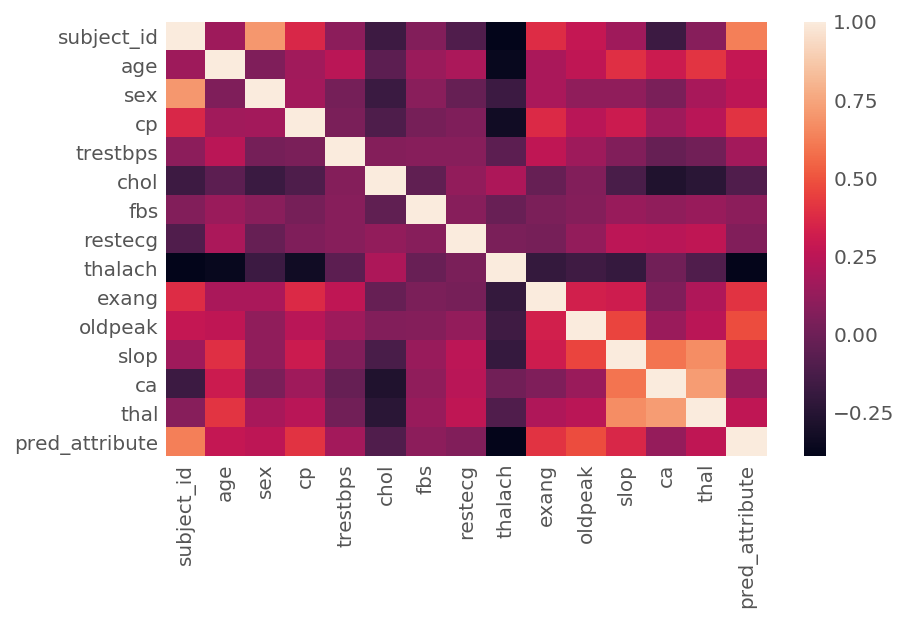

In [41]:
sns.heatmap(df.corr());

- The graph above shows us the relationship between each model. Where we can see there isn't any high correlation between variables. The best correlated values with pred_attribute are **olpeak, cp, exang, slop, thalach(negative relationship)**. 

In [42]:
gs_rfc.best_estimator_.fit(Xs, y)
importance_rfc = pd.Series(gs_rfc.best_estimator_.feature_importances_, index=Xs.columns).sort_values(ascending=False)
print('RFC:',importance_rfc)

RFC: cp_4.0                0.086111
thalach               0.083298
oldpeak               0.080345
chol                  0.067514
age                   0.066221
exang_1.0             0.064922
thal_7.0              0.060616
trestbps              0.058301
exang_0.0             0.057401
ca_0.0                0.045557
slop_2.0              0.044217
cp_2.0                0.036444
origin_Switzerland    0.033468
thal_3.0              0.025951
sex_1.0               0.025886
ca_2.0                0.020506
ca_1.0                0.018461
origin_Hungarian      0.017514
cp_3.0                0.016361
slop_1.0              0.014891
restecg_0.0           0.012019
origin_LongBeach      0.010350
fbs_1.0               0.009772
restecg_1.0           0.009438
restecg_2.0           0.008597
fbs_0.0               0.008546
thal_6.0              0.006788
slop_3.0              0.005536
ca_3.0                0.003360
ca_9.0                0.001610
dtype: float64


- By checking the feature importance for rfc; **cp, exang, thal, thalach, oldpeak, chol, slop** are the most related columns.

In [43]:
gs_dtc.best_estimator_.fit(Xs, y)
importance_dtc = pd.Series(gs_dtc.best_estimator_.feature_importances_, index=Xs.columns).sort_values(ascending=False)
print('DTC:',importance_dtc)

DTC: slop_2.0              0.299067
exang_1.0             0.165576
ca_0.0                0.132818
thal_7.0              0.124670
cp_4.0                0.080424
exang_0.0             0.072830
chol                  0.040911
oldpeak               0.034423
origin_Switzerland    0.019498
origin_Hungarian      0.012188
age                   0.006319
cp_3.0                0.005767
ca_1.0                0.003220
fbs_1.0               0.001743
trestbps              0.000548
ca_3.0                0.000000
slop_3.0              0.000000
thalach               0.000000
thal_6.0              0.000000
sex_1.0               0.000000
cp_2.0                0.000000
slop_1.0              0.000000
ca_9.0                0.000000
fbs_0.0               0.000000
ca_2.0                0.000000
restecg_0.0           0.000000
restecg_1.0           0.000000
restecg_2.0           0.000000
origin_LongBeach      0.000000
thal_3.0              0.000000
dtype: float64


- By checking the feature importance for dtc; **slop, cp, ca, thal, chol, oldpeak** are the most related columns.

- Above I compared the features for each best model from grid search and checked the relationship by looking at the correlation. The highest importance is the higher relationship between the pred_attribute. As a result **oldpeak, exang, slop, cp, thalach, chol** values are the ones that are most related to y (pred_attribute). Next step I am using these columns as my X value to predict the heart disease.  



** Modelling with Most Related Columns ** 

** Defining X & y **

In [44]:
related_df = df[['oldpeak', 'exang', 'slop', 'cp', 'thalach', 'chol', 'pred_attribute']]
X = related_df[['oldpeak', 'exang', 'slop', 'cp', 'thalach', 'chol']]
y = related_df[['pred_attribute']]

y['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)
y = y.pred_attribute

#Dummy the categorical values
X_dum = pd.get_dummies(X, columns = ['exang','slop','cp'], drop_first=True)

#Standardize the X
Xs = scaler.fit_transform(X_dum)
Xs = pd.DataFrame(Xs, columns = X_dum.columns)

#Train&Test Split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=random_state)

** Comparing the CV & Fitted Train/Test Scores **

In [45]:
cv_train = []
cv_test = []
train = []
test = []
for model in models:
    cv_test.append(cross_val_score(model, X_test, y_test, cv=5).mean())
    cv_train.append(cross_val_score(model, X_train, y_train, cv=5).mean())
    model.fit(X_train,y_train)
    train.append(model.score(X_train, y_train))
    test.append(model.score(X_test, y_test))
    
scores_df = pd.DataFrame(cv_train, index=models_names)   
scores_df.columns=['CV Train Score']
scores_df['CV Test Score'] = cv_test
scores_df['Training Data Accuracy Score'] = train
scores_df['Testing Data Accuracy Score'] = test
scores_df['Train-Test Difference'] = scores_df['Training Data Accuracy Score'] - scores_df['Testing Data Accuracy Score']
scores_df.sort_values('Train-Test Difference', ascending=False)

,CV Train Score,CV Test Score,Training Data Accuracy Score,Testing Data Accuracy Score,Train-Test Difference
AdaBoost,0.734249,0.746825,1.000000,0.746377,0.253623
Decision Tree,0.742037,0.743386,1.000000,0.750000,0.250000
Extra Trees,0.790149,0.797487,1.000000,0.789855,0.210145
Random Forest,0.787108,0.775529,0.987578,0.797101,0.190476
Gradient Boost,0.819679,0.804497,0.920807,0.822464,0.098344
k-Nearest Neighbors,0.799560,0.826058,0.877329,0.804348,0.072981
Gaussian Process,0.797949,0.822751,0.888199,0.822464,0.065735
Voting Classifier,0.810401,0.818783,0.871118,0.822464,0.048654
Bagging Classifier,0.791760,0.830026,0.847826,0.807971,0.039855
Linear SVM,0.824330,0.793386,0.827640,0.807971,0.019669


**Comparing the Accuracy Scores**

In [46]:
df_copy=[]
for model in models:
    model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    df_copy.append(metrics.accuracy_score(pred_test, y_test))
    
models_df2 = pd.DataFrame(df_copy, index=models_names)  
models_df2.columns = ['NewAccuracyScore']  

models_df2 = models_df2.merge(models_df, left_index=True, right_index=True, how='left')
models_df2['Difference'] = models_df2['NewAccuracyScore'] - models_df2['AccuracyScore']
models_df2.sort_values('NewAccuracyScore',ascending=False)

,NewAccuracyScore,AccuracyScore,Difference
RBF SVM,0.833333,0.858696,-0.025362
Support Vector Machine,0.833333,0.858696,-0.025362
Multilayer Perceptron,0.829710,0.862319,-0.032609
Gaussian Process,0.822464,0.851449,-0.028986
Voting Classifier,0.822464,0.858696,-0.036232
Gradient Boost,0.822464,0.855072,-0.032609
Gaussian Naive Bayes,0.822464,0.811594,0.010870
Logistic Regression,0.815217,0.855072,-0.039855
LDA,0.815217,0.855072,-0.039855
Bagging Classifier,0.807971,0.876812,-0.068841


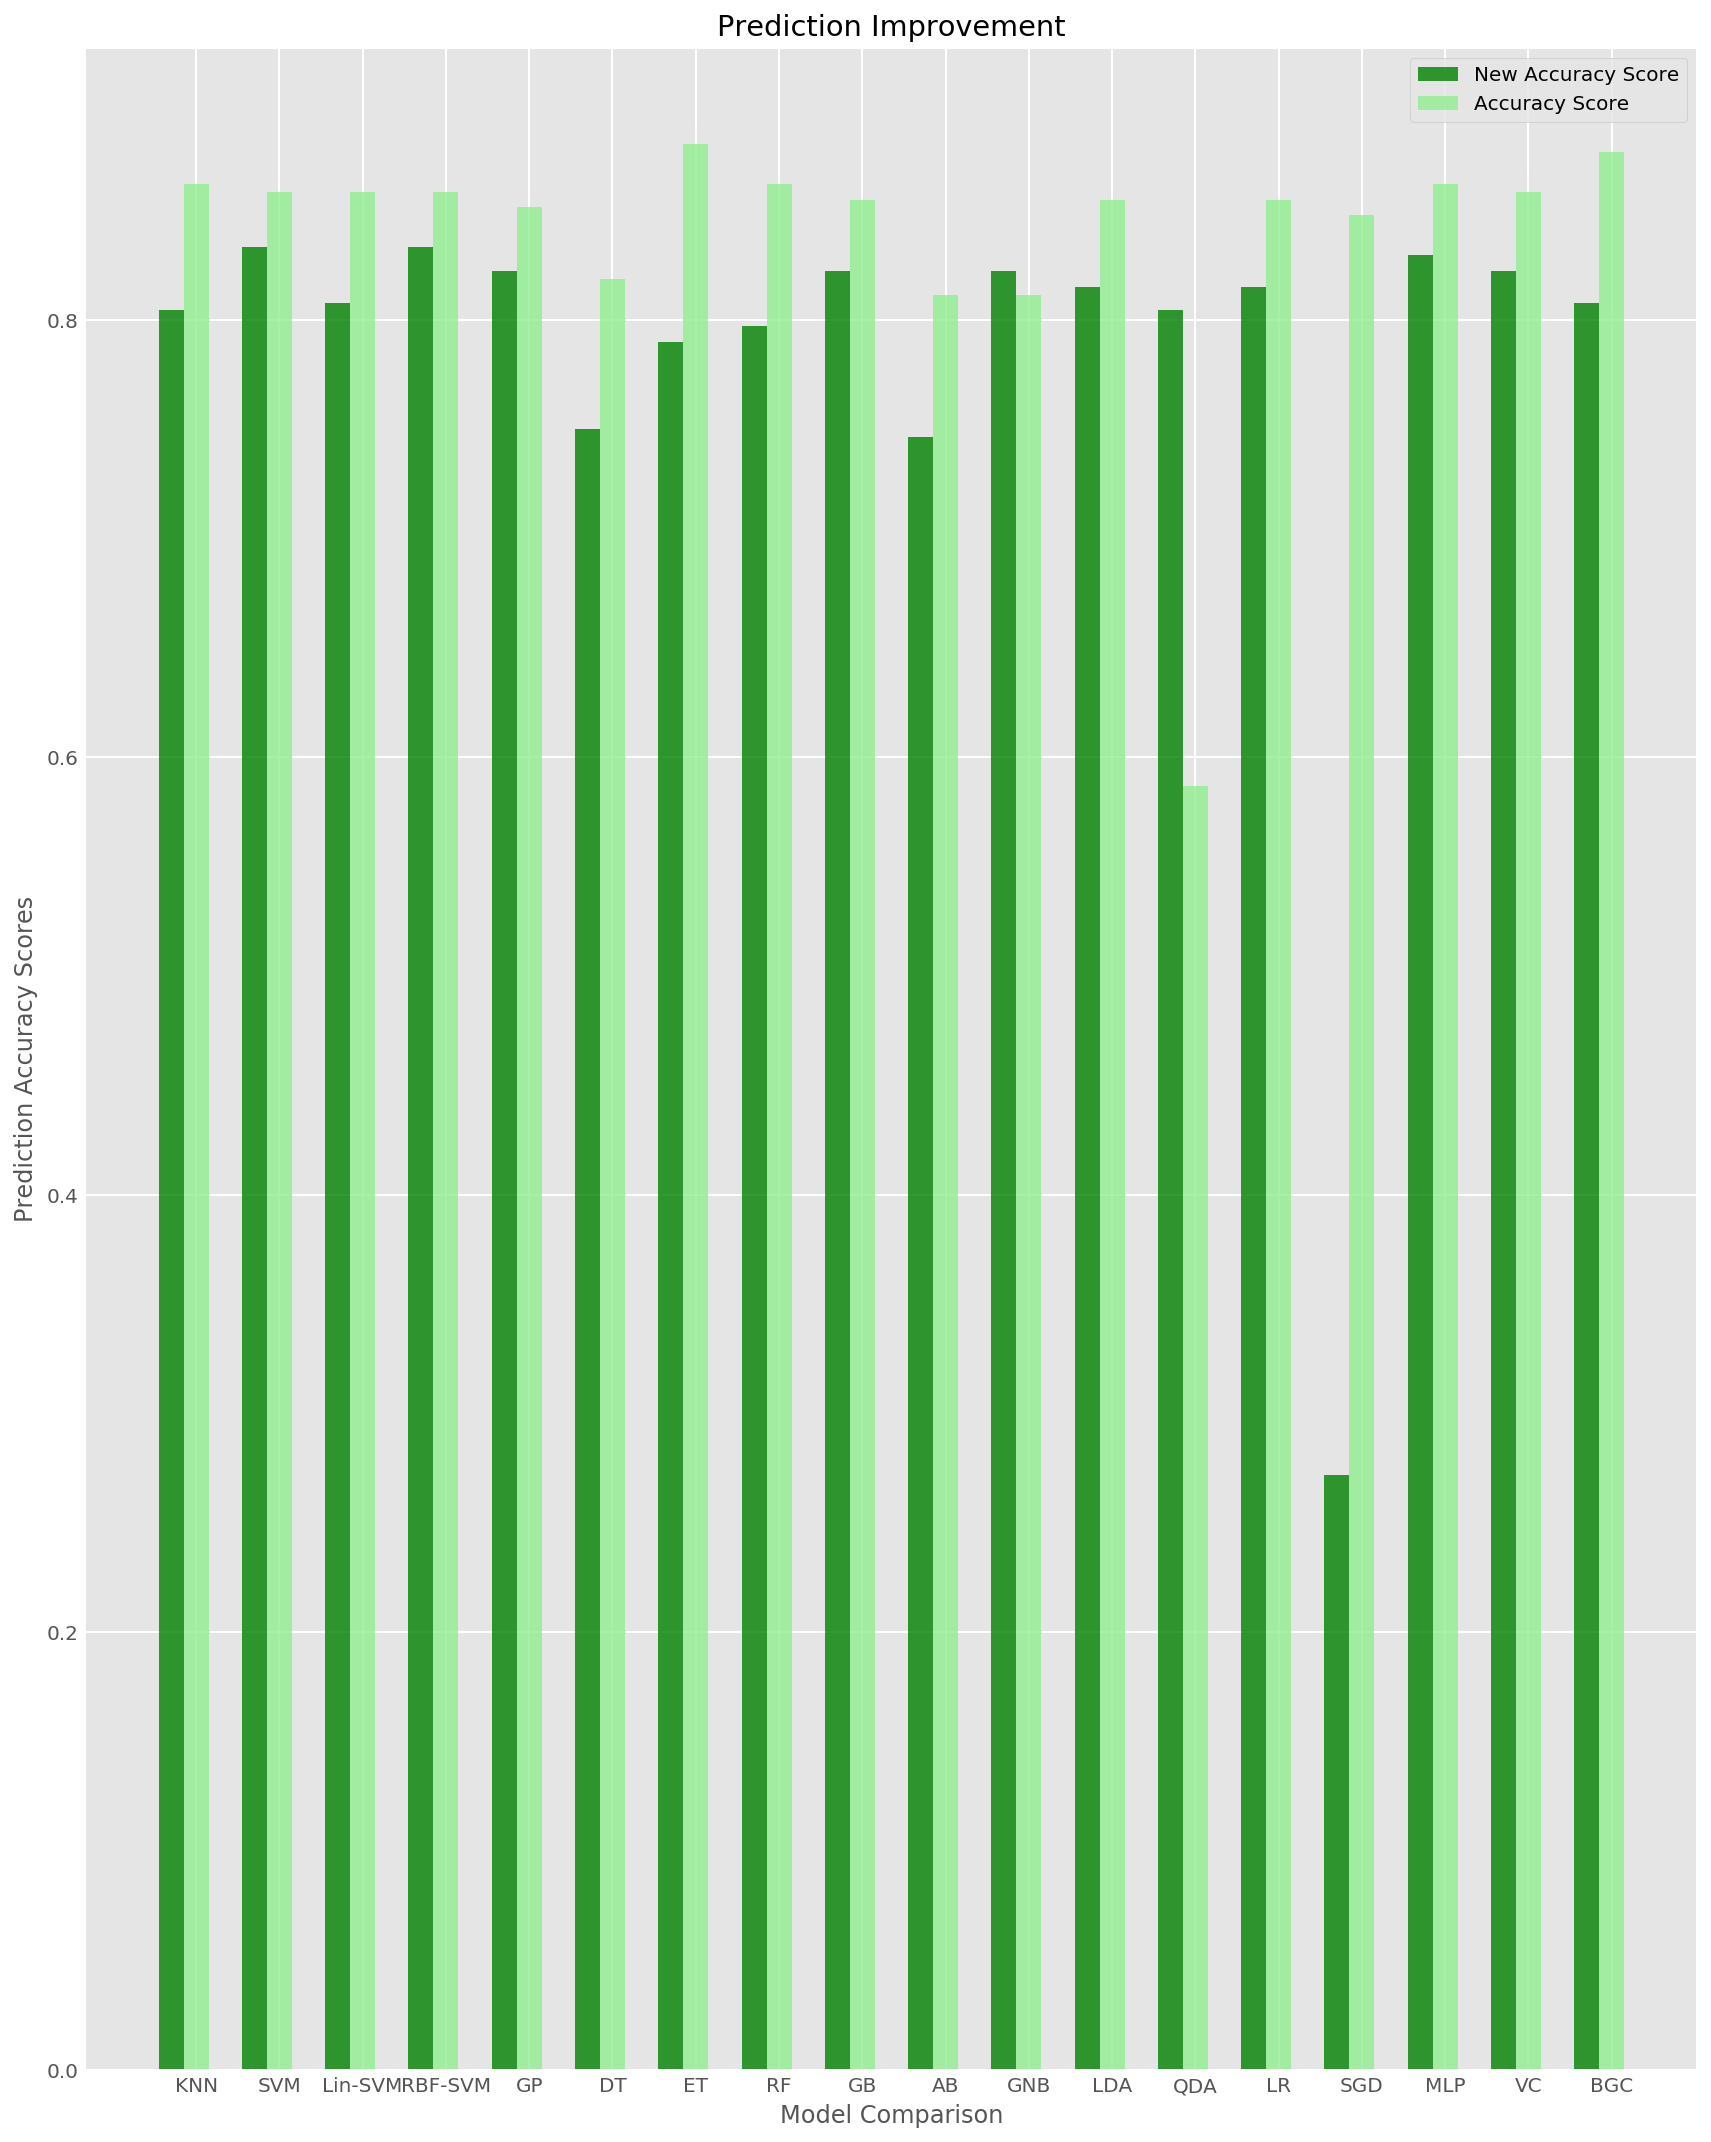

In [109]:
n_groups = 18

x_name = ['KNN', 'SVM', 'Lin-SVM', 'RBF-SVM', 'GP', 'DT', 'ET','RF', 'GB', 'AB', 'GNB','LDA', 'QDA', 'LR', 'SGD',
          'MLP', 'VC', 'BGC']

index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
fig = plt.figure(figsize=(12,15))

rects1 = plt.bar(index, models_df2.NewAccuracyScore, bar_width, 
                 alpha=opacity, color='green', label='New Accuracy Score')
rects2 = plt.bar(index + bar_width, models_df2.AccuracyScore, bar_width,  
                alpha=opacity, color='lightgreen', label='Accuracy Score')

plt.xlabel('Model Comparison')
plt.ylabel('Prediction Accuracy Scores')
plt.title('Prediction Improvement')
plt.xticks(index + bar_width, x_name)
plt.legend()
 
plt.tight_layout()
plt.show();

Data Frame above shows us the accuracy differences. As we can see most of the scores have been decreased. While each different model has its own method where it takes different columns and predict accordingly. 
- The correlation between columns are not very high, thus when we choose the most related columns the scores don't change that much, mostly they decrease. So I am proceeding my analysis by having all the columns to predict the disease. 

While the accuracy scores have been decreased I chose the best model by comparing the old scores where I used every column. 

Next step I did grid search on the models with highest score, to see if I can increase the accuracy by changing the parameters in the best models. These models are 
- Bagging Classifier 0.86
- Multilayer Perceptron 0.85
- RBF SVM 0.85
- Gradient Boost 0.85
- Support Vector Machine 0.85
- Logistic Regression 0.85

### Model Selection

Choose the best 6 models and continue analysis
    - Change the parameters and see the change
    - Pick the best model 

From the analysis from previous section, I picked **Bagging Classifier, Multilayer Perceptron, RBF SVM, Gradient Boost, Support Vector Machine, Logistic Regression, Voting Classifier** models as my best models. In this section I am trying to improve these best models by changing their parameter using Grid Search. At the end I will compare my accuracy scores with the previous one's and pick my best model. 

- Support Vector Machine and RBF SVM are going to be in the same Grid Search model, while they are both Support Vector Machine with different kernels. Grid Search will show the best kernel. 

** Define Values **

In [48]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 
        'slop', 'ca', 'thal','origin']]
y = df[['pred_attribute']]

y['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)
y = y.pred_attribute

#baseline
print('Baseline:', y.value_counts(normalize=True))

#get dummies for categorical variables
X_dumm = pd.get_dummies(X, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slop', 'ca', 'thal', 'origin'], 
                        drop_first = True)

#standardize the X
Xs = scaler.fit_transform(X_dumm)
Xs = pd.DataFrame(Xs, columns=X_dumm.columns)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3, random_state=random_state)

Baseline: 1.0    0.553261
0.0    0.446739
Name: pred_attribute, dtype: float64


** Grid Search Function **

** Models **

In [49]:
#Best Models
model_SVC = SVC(kernel="linear",random_state=random_state, probability=True)
model_MLP = MLPClassifier(hidden_layer_sizes=(100,), momentum=0.9, random_state=random_state)
model_BGC = BaggingClassifier(KNeighborsClassifier(),random_state=random_state)
model_LR = LogisticRegression(random_state=random_state)
model_VC = VotingClassifier(estimators=[('lr', LogisticRegression()), ('SVM',SVC(C=1000, probability=True)), 
                                        ('rf',RandomForestClassifier()), ('gnb', GaussianNB()),
                                        ('MLP', MLPClassifier(hidden_layer_sizes=(100,)))], voting = 'soft')
model_GBC = GradientBoostingClassifier(random_state=random_state)

** Parameters for GridSearch **

In [50]:
params_SVC = {'kernel' : ['linear','rbf','poly','sigmoid'] , 'gamma' : [1e-1, 1e-2, 1e-3, 1e-4],
              'C': [1, 10, 100, 1000] }

params_MLP = {'solver': ['sgd','lbfgs'], 'max_iter': np.arange(1000,2000,100), 
              'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 28)}

params_BGC = {'base_estimator':[None, Perceptron(),KNeighborsClassifier(),SVC()], 
              'n_estimators':np.arange(10,100,10), 'max_samples': np.linspace(0.8, 1.0, 3), 
              'max_features':range(int(3/4.*X_train.shape[1]), X_train.shape[1]+1), 'bootstrap': ['True','False']}

params_LR = {'penalty' : ['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

params_VC = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200] }

params_GBC = { 'learning_rate' : [0.01, 0.05, 0.075, 0.1, 0.2], 'max_depth' :[3,5,8],
              'min_samples_split' : np.linspace(0.1, 0.5, 12), 'min_samples_leaf' : np.linspace(0.1, 0.5, 12), 
              'max_features' :['log2','sqrt'], 'criterion' : ['friedman_mse',  'mae'], 
              'subsample':[0.5, 0.75, 0.9, 1.0] }


In [51]:
#Grid Search
gs_SVC = grid_search_func_tt(model_SVC, params_SVC, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_MLP = grid_search_func_tt(model_MLP, params_MLP, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_BGC = grid_search_func_tt(model_BGC, params_BGC, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_LR = grid_search_func_tt(model_LR, params_LR, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_VC = grid_search_func_tt(model_VC, params_VC, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_GBC = grid_search_func_tt(model_GBC, params_GBC, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)


Best score
0.4732603922776872

Best estimator
{'C': 10, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Test score:  0.42265608238575414
Best score
0.4984015842571502

Best estimator
{'activation': 'relu', 'alpha': 0.1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 14, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Test score:  0.4522634627762283
Best score
0.5231336587614525

Best estimator
{'base_estimator__C': 1.0, 'base_estimator__cache_size': 200, 'base_estimator__class_wei

KeyboardInterrupt: 

In [ ]:
#Comparing the CV, Test & Train Scores
cv_train = []
cv_test = []
train = []
test = []
gs_models =[gs_SVC.best_estimator_,gs_MLP.best_estimator_, gs_BGC.best_estimator_,
            gs_LR.best_estimator_, gs_VC.best_estimator_, gs_GBC.best_estimator_]
for model in gs_models:
    cv_test.append(cross_val_score(model, X_test, y_test, cv=5).mean())
    cv_train.append(cross_val_score(model, X_train, y_train, cv=5).mean())
    model.fit(X_train,y_train)
    train.append(model.score(X_train, y_train))
    test.append(model.score(X_test, y_test))
    
scores_df = pd.DataFrame(cv_train, index=['SVC','MLP','BGC','LR','VC', 'GBC'])   
scores_df.columns=['CV Train Score']
scores_df['CV Test Score'] = cv_test
scores_df['Training Data Accuracy Score'] = train
scores_df['Testing Data Accuracy Score'] = test
scores_df['Train-Test Difference'] = scores_df['Training Data Accuracy Score'] - scores_df['Testing Data Accuracy Score']
scores_df.sort_values('CV Train Score', ascending=False)

- Here I used Grid Search to analyse different parameters for each model and have a better score. 
- Score_Compare function shows the difference between train and test scores. Here the train & test scores are close each other, which shows there isn't overfittin at the dataset, and the model is training the data well while the test scores are close to the train scores. 
- Above we can see that overall the models are not overfitting the data. 
- When we check the CV_Train scores it will give us the correct accuracy scores on a not overfitted, regularized dataset. As a result the highest scored model is **BGC Model**.


** Accuracy Scores **

In [ ]:
y_pred_class_SVC = gs_SVC.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class_SVC))

In [ ]:
y_pred_class_MLP = gs_MLP.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class_MLP))

In [ ]:
y_pred_class_BGC = gs_BGC.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class_BGC))

In [ ]:
y_pred_class_LR = gs_LR.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class_LR))

In [ ]:
y_pred_class_VC = gs_VC.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class_VC))

In [ ]:
y_pred_class_GBC = gs_GBC.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class_GBC))

- When we compare the accuracy scores with the baseline, if the scores are higher than the baseline the model is working well, then we can choose the highest score as our best model. In this case baseline is 0.55 and models have higher score than the baseline, so the best model is **gs_VC**.

** Confusion Matrix & ROC, AUC, Precision, Recall Scores **

In [ ]:
from sklearn.metrics import auc, precision_score, recall_score

**SVC**

In [ ]:
print(confusion_matrix(y_train, y_pred_class_SVC))

In [ ]:
#False Positive Rate
32/644

In [ ]:
prob_SVC = pd.DataFrame(gs_SVC.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [ ]:
fpr_SVC, tpr_SVC, threshold_SVC = roc_curve(y_train, prob_SVC.class_1)

**MLP**

In [ ]:
print(confusion_matrix(y_train, y_pred_class_MLP))

In [ ]:
#False Positive Rate
37/644

In [ ]:
prob_MLP = pd.DataFrame(gs_MLP.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [ ]:
fpr_MLP, tpr_MLP, threshold_MLP = roc_curve(y_train, prob_MLP.class_1)

**GBC**

In [ ]:
print(confusion_matrix(y_train, y_pred_class_GBC))

In [ ]:
#False Positive Rate
30/644

In [ ]:
prob_GBC = pd.DataFrame(gs_GBC.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [ ]:
fpr_GBC, tpr_GBC, threshold_GBC = roc_curve(y_train, prob_GBC.class_1)

**BGC**

In [ ]:
print(confusion_matrix(y_train, y_pred_class_BGC))

In [ ]:
#False Positive Rate
26/644

In [ ]:
prob_BGC = pd.DataFrame(gs_BGC.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [ ]:
fpr_BGC, tpr_BGC, threshold_BGC = roc_curve(y_train, prob_BGC.class_1)

**LR**

In [ ]:
print(confusion_matrix(y_train, y_pred_class_LR))

In [ ]:
#False Positive Rate
35/644

In [ ]:
prob_LR = pd.DataFrame(gs_LR.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [ ]:
fpr_LR, tpr_LR, threshold_LR = roc_curve(y_train, prob_LR.class_1)

**VC**

In [ ]:
print(confusion_matrix(y_train, y_pred_class_VC))

In [ ]:
#False Positive Rate
19/644

In [ ]:
prob_VC = pd.DataFrame(gs_VC.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [ ]:
fpr_VC, tpr_VC, threshold_VC = roc_curve(y_train, prob_VC.class_1)

In [ ]:
#Data Frame of all the scores for each model
df_scores = pd.DataFrame({'CV Train Score' : [cross_val_score(gs_SVC.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_MLP.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_GBC.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_BGC.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_LR.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_VC.best_estimator_, X_train, y_train, cv=5).mean()] ,
                          
                          'AccuracyScore': [metrics.accuracy_score(y_train, y_pred_class_SVC),
                                            metrics.accuracy_score(y_train, y_pred_class_MLP), 
                                            metrics.accuracy_score(y_train, y_pred_class_GBC),
                                            metrics.accuracy_score(y_train, y_pred_class_BGC),
                                            metrics.accuracy_score(y_train, y_pred_class_LR), 
                                            metrics.accuracy_score(y_train, y_pred_class_VC) ],
                          
                          'ROCScore' : [roc_auc_score(y_train,prob_SVC.class_1),
                                        roc_auc_score(y_train,prob_MLP.class_1), 
                                        roc_auc_score(y_train,prob_GBC.class_1), 
                                        roc_auc_score(y_train,prob_BGC.class_1),
                                        roc_auc_score(y_train,prob_LR.class_1),
                                        roc_auc_score(y_train,prob_VC.class_1) ],
                          
                          'AUCScore' : [auc(fpr_SVC,tpr_SVC), auc(fpr_MLP,tpr_MLP), auc(fpr_GBC,tpr_GBC), 
                                        auc(fpr_BGC,tpr_BGC), auc(fpr_LR,tpr_LR), auc(fpr_VC,tpr_VC)
      ],
                          'PrecisionScore' : [precision_score(y_train,y_pred_class_SVC), 
                                              precision_score(y_train,y_pred_class_MLP), 
                                              precision_score(y_train,y_pred_class_GBC), 
                                              precision_score(y_train,y_pred_class_BGC),
                                              precision_score(y_train,y_pred_class_LR),
                                              precision_score(y_train,y_pred_class_VC)
       ], 
                          'RecallScore' : [recall_score(y_train,y_pred_class_SVC),
                                           recall_score(y_train,y_pred_class_MLP),
                                           recall_score(y_train,y_pred_class_GBC),
                                           recall_score(y_train,y_pred_class_BGC),
                                           recall_score(y_train,y_pred_class_LR), 
                                           recall_score(y_train,y_pred_class_VC),
       
      ]}, index = ['SVC','MLP','GBC','BGC','LR','VC'])

df_scores

- After all the analysis and modelling, the best model is **BGC** with **87%** accuracy score. Next section I used the best model on a different data frame where I didn't predict the missing values and dropped them. This is showing me if predicting missing values increase or decrease the prediction accuracy.
- Additionally **BGC**'s false positive score is 0.04 (diagnosing the subject as healthy but the subject is diseased).

In [ ]:
tp = np.sum((y_train == 1) & (y_pred_class_BGC == 1))
fp = np.sum((y_train == 0) & (y_pred_class_BGC == 1))
tn = np.sum((y_train == 0) & (y_pred_class_BGC == 0))
fn = np.sum((y_train == 1) & (y_pred_class_BGC == 0))
print("tp:", tp)
print("fp:", fp)
print("tn:", tn) 
print("fn:", fn)
print("Number of classification errors:", fp+fn)

In [ ]:
n_groups = 6

x_name = ['SVC','MLP','GBC','BGC','LR','VC']

fig = plt.figure(figsize=(12,15))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, df_scores['CV Train Score'], bar_width, 
                 alpha=opacity, color='lightgreen', label='CV Train Score')
rects2 = plt.bar(index + bar_width, df_scores.AccuracyScore, bar_width,  
                alpha=opacity, color='yellow', label='Accuracy Score')
rects3 = plt.bar(index + bar_width*2, df_scores.ROCScore, bar_width, 
                 alpha=opacity, color='orange', label='ROC Score')
rects4 = plt.bar(index + bar_width*3, df_scores.AUCScore, bar_width,  
                alpha=opacity, color='red', label='AUC Score')
rects5 = plt.bar(index + bar_width*4, df_scores.PrecisionScore, bar_width, 
                 alpha=opacity, color='lightblue', label='Precision Score')
rects6 = plt.bar(index + bar_width*5, df_scores.RecallScore, bar_width,  
                alpha=opacity, color='blue', label='Recall Score')

plt.xlabel('Model Comparison')
plt.ylabel('Scores')
plt.title('GridSearch Model Score Comparison')
plt.xticks(index + bar_width*3, x_name)
plt.legend()
 
plt.tight_layout()
plt.show();

In [ ]:
CV = [cross_val_score(gs_SVC.best_estimator_, X_train, y_train, cv=5).mean(),
      cross_val_score(gs_MLP.best_estimator_, X_train, y_train, cv=5).mean(),
      cross_val_score(gs_GBC.best_estimator_, X_train, y_train, cv=5).mean(),
      cross_val_score(gs_BGC.best_estimator_, X_train, y_train, cv=5).mean(),
      cross_val_score(gs_LR.best_estimator_, X_train, y_train, cv=5).mean(),
      cross_val_score(gs_VC.best_estimator_, X_train, y_train, cv=5).mean()] 
fig = plt.figure(figsize=(12,15))
index = ['SVC','MLP','GBC','BGC','LR','VC']
y_pos = np.arange(len(index))

plt.barh(y_pos, CV, align='center', alpha=0.5, color=['yellow', 'orange', 'red', 'magenta', 'green', 'blue'])
plt.yticks(y_pos, index)
plt.xlabel('CV Train Score')
plt.title('Best Model CV Scores')
 
plt.show();

In [ ]:
best_models = [SVC(random_state=random_state),
               MLPClassifier(hidden_layer_sizes=(100,),momentum=0.9,solver='sgd',random_state=random_state),
               GradientBoostingClassifier(random_state=random_state),
               BaggingClassifier(KNeighborsClassifier(),random_state=random_state),
               LogisticRegression(random_state=random_state),
               VotingClassifier(estimators=[('log', LogisticRegression()), ('SVM',SVC(C=1000)),                
                                            ('MLP', MLPClassifier(hidden_layer_sizes=(100,)))], voting='hard')]

cv_train = []
for model in best_models:
    cv_train.append(cross_val_score(model, X_train, y_train, cv=5).mean())
    
scores_cv_train = pd.DataFrame(cv_train, index=models_names)   
scores_cv_train.columns=['CV Train Score']

In [ ]:
x_names = ['SVC','MLP','GBC','BGC','LR','VC']
index = np.arange(n_groups)
fig = plt.figure(figsize=(12,15))
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, scores_df['CV Train Score'], bar_width, 
                 alpha=opacity, color='blue', label='Without GridSearch')
rects2 = plt.bar(index + bar_width, df_scores['CV Train Score'], bar_width,  
                alpha=opacity, color='lightblue', label='With GridSearch')

plt.xlabel('Score Comparison')
plt.ylabel('CV Train Scores')
plt.title('Score Change with Grid Search')
plt.xticks(index + bar_width, x_names)
plt.legend()
 
plt.tight_layout()
plt.show();

# 5. Comparison 

In this section I will use the selected best model and compare my result with another data frame. I will run the same model without predicting the null values (excluding the null values) and see if the model improved by predicting the missing values or not. 

This will help me to see the difference and importance of predicting null values. 

1. Define the new Data Frame 
    - Drop the null values
    - Define X&y values
2. Model the new Data Frame
3. Compare the scores dropped vs. predicted null values

### Dropping Null Values 

In [ ]:
df_dropnull = pd.read_csv('../Jupyter Notebook/df_null.csv')

In [ ]:
df_dropnull.isnull().sum()

In [ ]:
df_dropnull.dropna(inplace = True)

In [ ]:
df_dropnull.isnull().sum()

** Data Description **

In [ ]:
df_dropnull.shape

In [ ]:
df_dropnull.info()

In [ ]:
df_dropnull.describe()

In [ ]:
df_dropnull.corr()[['pred_attribute']].sort_values('pred_attribute',ascending=False)

- By checking the correlation, we can see the relationship between columns. The pred_attribute is highly correlated with ** olpeak, cp, exang, slop, thalach(negative relationship) **. 
- In section 4, I also concluded that that pred_attribute is highly correlated with **oldpeak, exang, slop, cp, thalach(negative relationship)**. 
- The related feutures and relationship doesn't change even if we the drop the null values or predict them.

** Define X&y **

In [ ]:
X = df_dropnull[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 
                    'exang', 'oldpeak', 'slop', 'ca', 'thal', 'origin']]
y = df_dropnull[['pred_attribute']]
y['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)
y = y.pred_attribute

#baseline
print('Baseline:', y.value_counts(normalize=True))

#get dummies for categorical variables
X_dumm = pd.get_dummies(X, columns = ['sex','cp','origin','restecg','exang','fbs','slop','thal','ca'], 
                        drop_first = True)

#standardize the X
Xs = scaler.fit_transform(X_dumm)
Xs = pd.DataFrame(Xs, columns=X_dumm.columns)

#train-test split
X_train_dn, X_test_dn, y_train_dn, y_test_dn = train_test_split(Xs, y, test_size = 0.3, random_state=random_state)

### Modelling 

** Using the best model **

In [ ]:
gs_BGC_dn = grid_search_func_tt(model_BGC, params_BGC, X_train_dn, X_test_dn, y_train_dn, y_test_dn, 
                            scoring_function=metrics.r2_score, scoring='r2',cv=5)

** Scores ** 

In [ ]:
score_compare(X_train_dn,X_test_dn,y_train_dn,y_test_dn,gs_BGC_dn.best_estimator_)

In [ ]:
y_pred_class_BGC_dn = gs_BGC_dn.best_estimator_.predict(X_train_dn)
print(metrics.accuracy_score(y_train_dn, y_pred_class_BGC_dn))

In [ ]:
prob_BGC_dn = pd.DataFrame(gs_BGC_dn.best_estimator_.predict_proba(X_train_dn), columns=['class_0','class_1'])

In [ ]:
print(confusion_matrix(y_train_dn, y_pred_class_BGC_dn))

In [ ]:
19/414

In [ ]:
tp = np.sum((y_train_dn == 1) & (y_pred_class_BGC_dn == 1))
fp = np.sum((y_train_dn == 0) & (y_pred_class_BGC_dn == 1))
tn = np.sum((y_train_dn == 0) & (y_pred_class_BGC_dn == 0))
fn = np.sum((y_train_dn == 1) & (y_pred_class_BGC_dn == 0))
print("tp:", tp)
print("fp:", fp)
print("tn:", tn) 
print("fn:", fn)
print("Number of classification errors:", fp+fn)

In [ ]:
#False Positive Rate
19/414

### Comparison of Dropped vs. Predicted Null Values 

In [ ]:
fpr_BGC_dn, tpr_BGC_dn, threshold_BGC_dn = roc_curve(y_train_dn, prob_BGC_dn.class_1)
fpr_BGC, tpr_BGC, threshold_BGC = roc_curve(y_train, prob_BGC.class_1)

In [ ]:
#Data Frame of all the scores for each model

df_scores_2 = pd.DataFrame({'CV_TrainScore' : [cross_val_score(gs_BGC.best_estimator_, X_train, y_train, cv=5).mean(),
                                               cross_val_score(gs_BGC_dn.best_estimator_, X_train_dn, y_train_dn, cv=5).mean(),],
                            'AccuracyScore' : [metrics.accuracy_score(y_train, y_pred_class_BGC), 
                                               metrics.accuracy_score(y_train_dn, y_pred_class_BGC_dn)],
                            'ROCScore' : [roc_auc_score(y_train,prob_BGC.class_1),
                                          roc_auc_score(y_train_dn,prob_BGC_dn.class_1)],
                            'AUCScore' : [auc(fpr_BGC,tpr_BGC), auc(fpr_BGC_dn,tpr_BGC_dn)],
                            'PrecisionScore' : [precision_score(y_train,y_pred_class_BGC), 
                                                precision_score(y_train_dn,y_pred_class_BGC_dn)],
                            'RecallScore' : [recall_score(y_train,y_pred_class_BGC),
                                             recall_score(y_train_dn,y_pred_class_BGC_dn)]}, 
                         index = ['PredictedNull','DroppedNull'])
df_scores_2

In [ ]:
pd.DataFrame({'AccuracyScore':[metrics.accuracy_score(y_train, y_pred_class_BGC), 
                  metrics.accuracy_score(y_train_dn, y_pred_class_BGC_dn)]}, index = ['PredictedNull','DroppedNull'])

The accuracy score of dropped missing value is **0.86** and the predicted one is **0.91**. Overall the analysis shows us **predicting the missing values** has better analysis than dropping the null values. 

For this classification model I want my recall and precision score to be as high as possible. A precision score of 1 indicates that the classifier never mistakenly classified the current class as another class. Precision score of 0 would mean that the classifier misclassified every instance of the current class. Which means the model will not mistakenly predict a sick person as healthy. In this case the recall and precision scores of predicted null values are higher than the dropped null values.

In [ ]:
CV =[cross_val_score(gs_BGC.best_estimator_, X_train, y_train, cv=5).mean(),
     cross_val_score(gs_BGC_dn.best_estimator_, X_train_dn, y_train_dn, cv=5).mean(),]
AS = [metrics.accuracy_score(y_train, y_pred_class_BGC),metrics.accuracy_score(y_train_dn, y_pred_class_BGC_dn)]
ROC = [roc_auc_score(y_train,prob_BGC.class_1), roc_auc_score(y_train_dn,prob_BGC_dn.class_1)]
AUC = [auc(fpr_BGC,tpr_BGC), auc(fpr_BGC_dn,tpr_BGC_dn)]
PS = [precision_score(y_train,y_pred_class_BGC), precision_score(y_train_dn,y_pred_class_BGC_dn)]
RC = [recall_score(y_train,y_pred_class_BGC), recall_score(y_train_dn,y_pred_class_BGC_dn)]

n_groups = 6

pred_null = [cross_val_score(gs_BGC.best_estimator_, X_train, y_train, cv=5).mean(),
             metrics.accuracy_score(y_train, y_pred_class_BGC), roc_auc_score(y_train,prob_BGC.class_1),
             auc(fpr_BGC,tpr_BGC), precision_score(y_train,y_pred_class_BGC), recall_score(y_train,y_pred_class_BGC)]

drop_null = [cross_val_score(gs_BGC_dn.best_estimator_, X_train_dn, y_train_dn, cv=5).mean(),
             metrics.accuracy_score(y_train_dn, y_pred_class_BGC_dn), roc_auc_score(y_train_dn,prob_BGC_dn.class_1),
             auc(fpr_BGC_dn,tpr_BGC_dn), precision_score(y_train_dn,y_pred_class_BGC_dn), 
             recall_score(y_train_dn,y_pred_class_BGC_dn)]

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, pred_null, bar_width, alpha=opacity, color='orange', label='Pred Null')
rects2 = plt.bar(index + bar_width, drop_null, bar_width, alpha=opacity, color='green', label='Dropped Null')

plt.xlabel('Comparison')
plt.ylabel('Scores')
plt.title('Dropped Null vs Predicted Null Score Comparison')
plt.xticks(index + bar_width, ('CV','Accuracy','ROC','AUC','Precision','Recall'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [ ]:
prob_BGC = pd.DataFrame(gs_BGC.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [ ]:
# ROC Curve Graph for Dropped Missing Value Data Frame
fpr, tpr, threshold = roc_curve(y_train_dn, prob_BGC_dn.class_1)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has heart disease)
plt.figure(figsize=[6,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4, color = 'r')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Heart Disease Prediction', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl",3))

In [ ]:
def plot_f1_lines(figsize=(8,6),fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)
    
    # add lines of constant F1 scores
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

In [ ]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_train_dn,  prob_BGC_dn, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

In [ ]:
# ROC Curve Graph for Predicted Missing Value Data Frame
fpr, tpr, threshold = roc_curve(y_train,  prob_BGC.class_1)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has heart disease)
plt.figure(figsize=[6,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4, color = 'r')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Heart Disease Prediction', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_train,  prob_BGC, plot_micro=True, title_fontsize=20, text_fontsize=16, 
                                    cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

# 6. Conclusion

All in all, by the analysis we can see that predicting the missing values increases the accuracy. I used two different ways to predict the missing values, first was predicting the whole dataset once, second was predicting by separating the dataset into sex and disease classes. At the end predicting missing values by separating different classes was a better prediction, while it increased the disease prediction. Additionally, both approaches had higher disease prediction than dropping the missing values. On the other hand, using different modelling for the dataset will help us see different methods and increase the accuracy of our analysis at the end. 

Our best model with predicting the missing values has **0.91** of prediction score, if we drop the missing values the score decreases to **0.86**. On the other hand, eliminating less related columns does not help, thus having all the columns is a better way to predict disease. The decrease in the scores are also caused by the number of subjects(patients). If we had more subjects the predictions would have been more accurate. 

Additionally, the recall and precision scores are very important for healthcare classification analysis. When we predicted the null values the recall & precision scores were higher, where recall score is 0.91 and precision score is 0.92. 

In conclusion, this project helps us to predict a heart disease on a subject with **91%** accuracy (by predicting the missing values), which can help doctors to diagnose heart diseases faster. This will increase the time efficiency on the diagnosis and continue with the further testing faster to cure the diseases. 

## Risks & Difficulties
    
The risks for the project:
- The correlation between the columns are not very high 
- While I was doing the missing value predictions for each model the scores were not as high as I expected. 
    - Thus, I split the data frame into sex and pred_attribute to have more accurate predictions for missing values.

The difficulties:
1. Missing Value Prediction
    1. GridSearch parameters for categorical modelling
        - I struggled what to put into the parameters for my categorical modelling. At the end I left it with the default.    
    2. Low modelling scores
        - I had lower scores when I first predicted the missing values. By changing my approach and split the data frame into four different categories the scores increased.
2. Heart Disease Prediction
    1. The scores were overall very high and close to each other, the interpretation was almost the same. 
    2. Choosing Different Models
        - It was hard to find different models to use for my predictions, then I found a kernel on Kaggle which helped me a lot. 
    3. Improving the model
        - After choosing the best columns and compare the new accuracy scores, the scores were decreased. I was hoping to have a better result. This shows my first assumption to improve the accuracy was not right. 
        - Comparing the dropped null data frame scores with the predicted one was a great approach.
    4. Interpretation 
        - During the whole course the biggest struggle for me was the interpretation and again in this report I needed to understand and explain all the results. It was a great practice and I need to work on that more to improve my analysis. 
        
Most of the difficulties were during predicting the missing values, and while using different models understanding the whole theories and concepts of the models. The project helped me understand different models and how prediction can change in different circumstances. 

## Next Steps

This project showed us how to predict heart diseases with highest accuracy. Next, we can increase the analysis by collecting more data, and increase the variety. As a result, our prediction accuracy scores will be higher. I can also predict diseases more specifically and give patients recommendations and how they can continue their treatments. This will help patients understand their disease and help them get through this process. 